In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/meta1"):
    df = pd.read_csv(f"../logs/experiment/meta1/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
title_dict = {
    "r": "ReLU",
    "l": "LReLU",
    "e": "ELU",
    "s": "SELU",
}
for act in ["r", "l", "e", "s"]:
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        if not df["Value"].isnull().values.any():
            if names[i][0] == act:
                if names[i][-2] == "s":
                    ax.plot(df["Step"], df["Value"], label=names[i], color=f"C{i}")
                    if np.array(df["Step"])[-1] > 600:
                        axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{i}")
            
    plt.title(f"Validation Loss for first Grid Search: {title_dict[act]} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 1)
    plt.xlim(0, 950)
    plt.legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    meta = names[i].split("-")
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/pacs_meta2"):
    df = pd.read_csv(f"../logs/experiment/pacs_meta2/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [ ]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

In [ ]:
for depth in [1, 2]:
    k=0
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] != "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
    for i, df in enumerate(dfs):
        name = names[i].split("-")
        if int(name[1]) == depth and name[0] == "1024":
            label = name[0] + ",  "
            if name[0] != "1024":
                label += "  "
            for j in range(2,8):
                label += name[j] + "-"
            ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
            if np.array(df["Step"])[-1] > 600:
                axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axins.set_ylim(0.05, 0.075)
                axins.set_xlim(14500, 19000)
            k+=1
            
    plt.title(f"Validation Loss for second Grid Search: Depth {depth} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 0.2)
    plt.xlim(0, 20000)
    plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
    plt.show()

In [ ]:
k=0
fig, ax = plt.subplots(figsize=(12, 8))
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
for i, df in enumerate(dfs):
    name = names[i].split("-")
    if name[0] == "1024":
        label = name[0] + ",  "
        if name[0] != "1024":
            label += "  "
        label += name[1] + ",  "
        for j in range(2,8):
            label += name[j] + "-"
        ax.plot(df["Step"], df["Value"], label=label[:-1], color=f"C{k}")
        if np.array(df["Step"])[-1] > 600:
            axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
            axins.set_ylim(0.05, 0.075)
            axins.set_xlim(14500, 19000)
        k+=1
        
plt.title(f"Validation Loss for second Grid Search: Latent Size 1024 Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20000)
plt.legend(bbox_to_anchor=(1.43,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
for i, df in enumerate(dfs):
    # df.dropna(inplace=True)
    meta = names[i].split("-")
    depth = meta[1]
    latent_size = meta[0]
    out_channels = meta[2]
    for j in range(3,7):
        out_channels += ", " + meta[j]
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {depth} & {latent_size} & {out_channels}")

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

In [ ]:
# ERM
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
fig, ax = plt.subplots(figsize=(12, 8))
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
k = 0
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.0":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.01":
        label = linearity_dict[name[4]] + " ERM, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
for i, df in enumerate(dfs):
    name = names[i].split("_")
    if name[3] == "ERM" and name[5] == "0.1":
        label = linearity_dict[name[4]] + " model, Weight Decay: " + name[5]
        ax.plot(df["Step"], df["Value"], label=label, color=f"C{k}")
        # if np.array(df["Value"])[-1] < 0.2:
            # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
        k += 1
        
plt.title(f"Validation Loss for Classifier Grid Search: model Models", size=18)
plt.xlabel("Step", size=14)
plt.ylabel("Validation Loss", size=14)
# plt.ylim(0, 1)
# plt.xlim(0, 950)
plt.legend(bbox_to_anchor=(1.4,1.014), loc="upper right", fontsize=12)
plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
for act in ["relu", "selu", "elu"]:
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
    fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
    for j in range(2):
        axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
        k = 0
        for i, df in enumerate(dfs):
            name = names[i].split("_")
            if name[3] == "CNN" and name[6] == act:
                out_cs = name[7].split("-")
                out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
                if name[5] == str(j+1):
                    if name[4] == "128":
                        spacer = ""
                    else:
                        spacer = "  "
                    label = f"{name[4]}, {spacer}{out_c}"
                    label += " " * abs(23 - len(label))
                    axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                    # if np.array(df["Value"])[-1] < 0.2:
                        # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                    axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                    k += 1
        if act == "relu":
            top = 1.3
        elif act == "elu":
            top = 0.275
        elif act == "selu":
            top = 0.275
        axes[j].set_ylim(0, top)
        axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# CNN
title_dict = {
    "relu": "ReLU",
    "elu": "ELU",
    "selu": "SELU",
}
out_c_dict = {
    0: "[32, 32, 64]",
    1: "[64, 64, 128]",
    2: "[128, 128, 256]",
}
latent_dict = {
    0: "32",
    1: "64",
    2: "128",
}
# axins = ax.inset_axes([0.5, 0.65, 0.48, 0.32])
# axins.set_xticks([30000, 40000])
fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)
for j in range(2):
    axes[j].scatter([0], [0], color="white", label=f"Models with Depth: {j+1}")
    k = 0
    for i, df in enumerate(dfs):
        name = names[i].split("_")
        if name[3] == "CNN" and name[6] == act:
            out_cs = name[7].split("-")
            out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
            if name[5] == str(j+1):
                if name[4] == "128":
                    spacer = ""
                else:
                    spacer = "  "
                label = f"{name[4]}, {spacer}{out_c}"
                label += " " * abs(23 - len(label))
                axes[j].plot(df["Step"], df["Value"], label=label, color=f"C{k}")
                # if np.array(df["Value"])[-1] < 0.2:
                    # axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{k}")
                axes[j].legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
                k += 1
    if act == "relu":
        top = 1.3
    elif act == "elu":
        top = 0.275
    elif act == "selu":
        top = 0.275
    axes[j].set_ylim(0, top)
    axes[j].set_xlim(0, 45000)
            
    axes[0].set_title(f"Validation Loss for Classifier Grid Search for CNN: {title_dict[act]} Models", size=18)
    axes[1].set_xlabel("Step", size=14)
    axes[0].set_ylabel("Validation Loss", size=14)
    axes[1].set_ylabel("Validation Loss", size=14)
    plt.tight_layout()
    plt.show()

In [ ]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/rmnist_classifier"):
    df = pd.read_csv(f"../logs/experiment/rmnist_classifier/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)
print(names[0])
print(dfs[0].head())
print(dfs[0].tail())

activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
linearity_dict = {
    "False": "Shallow",
    "True": "Deep",
}
scores = np.zeros(len(dfs))
N = 2
for i, df in enumerate(dfs):
    #df.dropna(inplace=True)
    meta = names[i].split("-")
    # score = np.mean(np.array(df['Value'])[-N:])
    score = np.min(np.array(df["Value"]))
    # print(i, score)
    scores[i] = score
    # print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")
sort_inds = np.argsort(scores)
scores = scores[sort_inds]
names_sorted = []
for ind in sort_inds:
    names_sorted.append(names[ind])

print(f" Minimal Validation Loss & Architecture & Weight Decay")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "ERM":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {linearity_dict[name[4]]} & {name[5]}")


print(f" Minimal Validation Loss & Latent Size & Depth & Activation & Output Channels")
print("\hline")
for i in range(len(scores)):
    name = names_sorted[i].split("_")
    if name[3] == "CNN":
        out_cs = name[7].split("-")
        out_c ="[" + out_cs[0] + ", " + out_cs[1] + ", " + out_cs[2] + "]"
        print(f"{np.round(scores[i], 5)} & {name[4]} & {name[5]} & {activation_dict[name[6]]} & {out_c}")


In [ ]:
import umap

In [ ]:
import torch
latent_data = torch.randn(size=(500, 1024))
reducer = umap.UMAP(random_state=17)
reducer.fit(latent_data)
embedding = reducer.embedding_

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

new_lat = torch.randn_like(latent_data)
normal_embedding = reducer.transform(new_lat)

In [ ]:

compare_embedding = np.concatenate((embedding, normal_embedding), axis=0)

In [ ]:

compare_colors = np.concatenate((np.zeros(normal_embedding.shape[0], dtype=np.int32), np.ones(normal_embedding.shape[0], dtype=np.int32)), axis=0)

In [ ]:

plt.figure(figsize=(10, 8))
plt.scatter(compare_embedding[:, 0], compare_embedding[:, 1], c=compare_colors, cmap="jet", s=5)
plt.gca().set_aspect("equal", "datalim")
cbar = plt.colorbar(boundaries=np.arange(2+1)-0.5)
cbar.set_ticks(np.arange(2))
cbar.ax.set_yticklabels(["latent space", "normal distribution"])
plt.title("UMAP projection of the latent space and normal distribution", fontsize=14)
plt.show()

In [ ]:
import pandas as pd
import tensorboard as tb

In [ ]:
filepath = "../logs/experiment/rmnist_meta4/version_0/events.out.tfevents.1646341545.kollemate.iwr.uni-heidelberg.de.30143.0"
print(os.getcwd())
with open (filepath, "r", errors="ignore", encoding="cp1252") as f:
    print(f)
    lines = f.readlines()
    for line in lines:
        if "epoch"in line:
            pass
            # print(line)
            # print(u"§³åÉ".encode("cp1252"))#.decode("latin1"))

In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
event_acc = EventAccumulator('../logs/experiment/rmnist_meta4/model_01234/version_0/events.out.tfevents.1646341545.kollemate.iwr.uni-heidelberg.de.30143.0')
event_acc.Reload()
# Show all tags in the log file
print(event_acc.Tags())

# E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
w_times, step_nums, vals = zip(*event_acc.Scalars('epoch'))

In [ ]:
print(w_times, step_nums, vals)

In [ ]:
event_acc.Reload()

w_times, step_nums, vals = zip(*event_acc.Scalars('epoch'))
print(vals[-1])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/dg_results"):
    df = pd.read_csv(f"../logs/experiment/dg_results/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [4]:
print(dfs[0].head())
print(names[0])

      Wall time  Step     Value
0  1.646681e+09     0  0.723607
run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv


In [5]:
data = {
    names[i]: dfs[i]["Value"][0] for i in range(len(dfs))
}
print(len(data))

264


In [6]:
print(data)

{'run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv': 0.7236074209213257, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01235_version_0-tag-test_loss.csv': 0.9754934310913086, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01245_version_0-tag-test_loss.csv': 0.9714842438697816, 'run-dg_results_id_runs_new_10_1_CNN_augmented_01345_version_0-tag-test_loss.csv': 0.1150596439838409, 'run-dg_results_id_runs_new_10_1_CNN_augmented_02345_version_0-tag-test_loss.csv': 0.7201389074325562, 'run-dg_results_id_runs_new_10_1_CNN_augmented_12345_version_0-tag-test_loss.csv': 1.0063486099243164, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01234_version_0-tag-test_loss.csv': 0.0528787076473236, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01235_version_0-tag-test_loss.csv': 0.05225071310997, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01245_version_0-tag-test_loss.csv': 0.0413004606962204, 'run-dg_results_id_runs_new_10_1_ERM_augmented_01345_version_0-tag-test_lo

In [7]:
value_arr = np.array(list(data.values()))
name_arr = np.array(list(data.keys()))
print(value_arr[0])
print(name_arr[0])
inds = np.argsort(value_arr)
value_arr = value_arr[inds]
name_arr = name_arr[inds]

0.7236074209213257
run-dg_results_id_runs_new_10_1_CNN_augmented_01234_version_0-tag-test_loss.csv


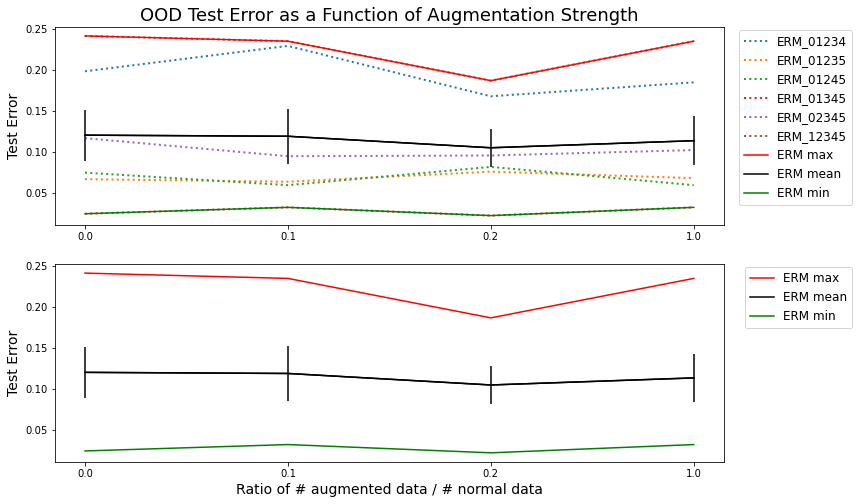

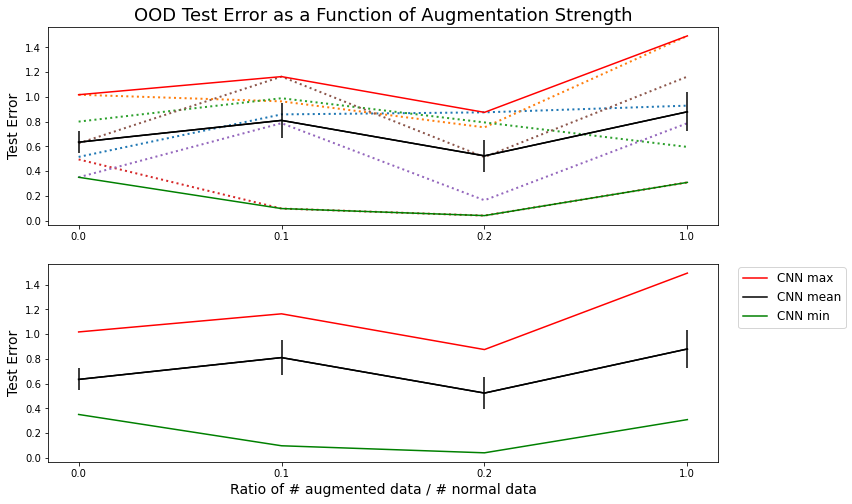

In [8]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "ood_runs" in n and "long" not in n:
        meta = n.split("_")
        k = meta[7] + "_" + meta[9]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100, 100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "10_1" in n:
            d[k][1] = v
        elif "5_1" in n:
            d[k][2] = v
        elif "1_1" in n:
            d[k][3] = v
plt.subplot(2, 1, 1)
plt.title("OOD Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(4)
D_ERM_mean = np.zeros(4)
ERM_max = np.zeros(4)
ERM_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    D_ERM_mean += np.array(d[k] - ERM_mean) ** 2
D_ERM_mean = np.sqrt(D_ERM_mean) / 6.0
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.errorbar(np.arange(4), ERM_mean, yerr=D_ERM_mean, color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.errorbar(np.arange(4), ERM_mean, yerr=D_ERM_mean, color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("OOD Test Error as a Function of Augmentation Strength", size=18)
CNN_mean = np.zeros(4)
D_CNN_mean = np.zeros(4)
CNN_max = np.zeros(4)
CNN_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    D_CNN_mean += np.array(d[k] - CNN_mean) ** 2
D_CNN_mean = np.sqrt(D_CNN_mean) / 6.0
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.errorbar(np.arange(4), CNN_mean, yerr=D_CNN_mean, color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.errorbar(np.arange(4), CNN_mean, yerr=D_CNN_mean, color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.show()

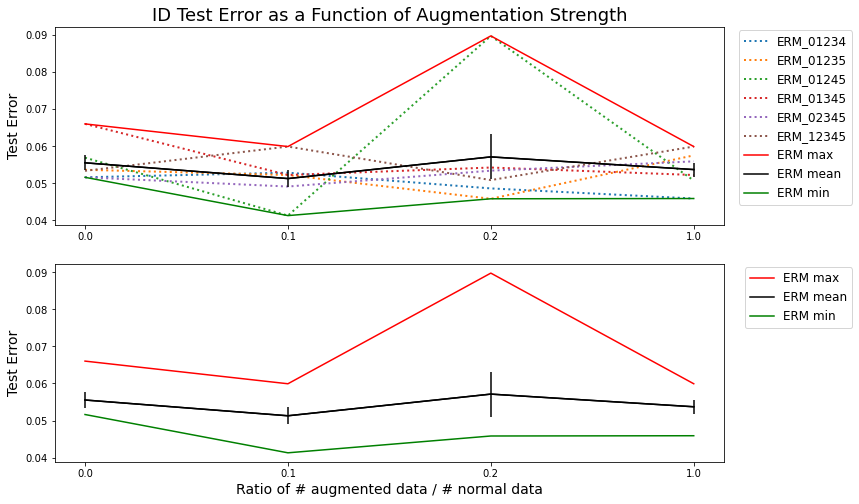

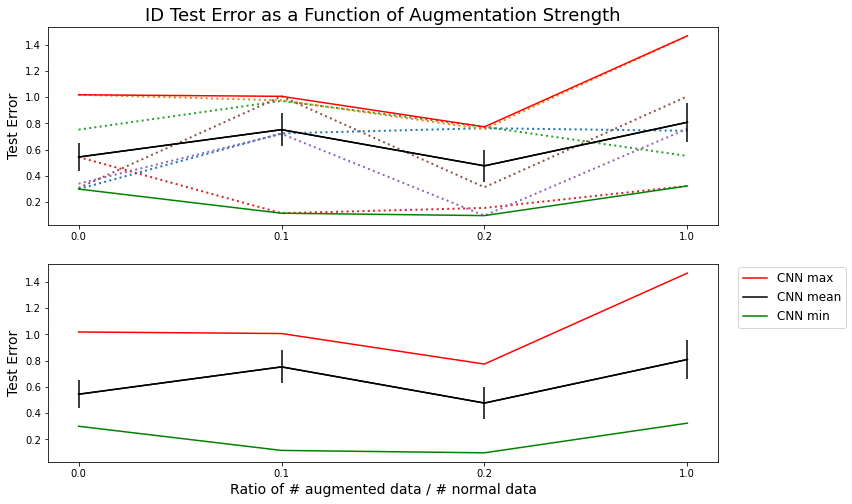

In [9]:
plt.figure(figsize=(12, 8))
d = {}
for v, n in zip(value_arr, name_arr):
    if "id_runs" in n and "long" not in n:
        meta = n.split("_")
        k = meta[7] + "_" + meta[9]
        # print(k)
        if k not in list(d.keys()):
            d[k] = [100, 100, 100, 100]
        if "normal" in n:
            d[k][0] = v
        elif "10_1" in n:
            d[k][1] = v
        elif "5_1" in n:
            d[k][2] = v
        elif "1_1" in n:
            d[k][3] = v
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
ERM_mean = np.zeros(4)
D_ERM_mean = np.zeros(4)
ERM_max = np.zeros(4)
ERM_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    ERM_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > ERM_max[i]:
            ERM_max[i] = v
        if v < ERM_min[i]:
            ERM_min[i] = v
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "ERM_" + k
    D_ERM_mean += np.array(d[k] - ERM_mean) ** 2
D_ERM_mean = np.sqrt(D_ERM_mean) / 6.0
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.errorbar(np.arange(4), ERM_mean, yerr=D_ERM_mean, color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), ERM_max, label="ERM max", color="r")
plt.plot(np.arange(4), ERM_mean, label="ERM mean", color="k")
plt.errorbar(np.arange(4), ERM_mean, yerr=D_ERM_mean, color="k")
plt.plot(np.arange(4), ERM_min, label="ERM min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.show()

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("ID Test Error as a Function of Augmentation Strength", size=18)
CNN_mean = np.zeros(4)
D_CNN_mean = np.zeros(4)
CNN_max = np.zeros(4)
CNN_min = np.ones(4) * 100
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    plt.plot(np.arange(4), d[k], label=k, ls=":", linewidth=2)
    CNN_mean += np.array(d[k]) / 6.0
    for i, v in enumerate(d[k]):
        if v > CNN_max[i]:
            CNN_max[i] = v
        if v < CNN_min[i]:
            CNN_min[i] = v
for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
    k = "CNN_" + k
    D_CNN_mean += np.array(d[k] - CNN_mean) ** 2
D_CNN_mean = np.sqrt(D_CNN_mean) / 6.0
plt.ylabel("Test Error", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.errorbar(np.arange(4), CNN_mean, yerr=D_CNN_mean, color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.subplot(2, 1, 2)
plt.plot(np.arange(4), CNN_max, label="CNN max", color="r")
plt.plot(np.arange(4), CNN_mean, label="CNN mean", color="k")
plt.errorbar(np.arange(4), CNN_mean, yerr=D_CNN_mean, color="k")
plt.plot(np.arange(4), CNN_min, label="CNN min", color="g")
plt.legend(bbox_to_anchor=(1.2,1.014), loc="upper right", fontsize=12)
plt.ylabel("Test Error", size=14)
plt.xlabel("Ratio of # augmented data / # normal data", size=14)
plt.xticks([0, 1, 2, 3], ["0.0", "0.1", "0.2", "1.0"])
plt.show()

In [10]:
def calc(name, mode):
    d_1 = {}
    d_2 = {}
    d_3 = {}
    for v, n in zip(value_arr, name_arr):
        if f"{mode}_runs" in n and "long_C" in n or "long_E" in n:
            meta = n.split("_")
            # print(meta)
            k = meta[8] + "_" + meta[10]
            # print(k)
            if k not in list(d_1.keys()):
                d_1[k] = np.ones(2) * 100
            if "normal" in n:
                d_1[k][0] = v
            elif "augmented" in n:
                d_1[k][1] = v
    for v, n in zip(value_arr, name_arr):
        if f"{mode}_runs" in n and "long_2" in n:
            meta = n.split("_")
            # print(meta)
            k = meta[9] + "_" + meta[11]
            # print(k)
            if k not in list(d_2.keys()):
                d_2[k] = np.ones(2) * 100
            if "normal" in n:
                d_2[k][0] = v
            elif "augmented" in n:
                d_2[k][1] = v
    for v, n in zip(value_arr, name_arr):
        if f"{mode}_runs" in n and "long_3" in n:
            meta = n.split("_")
            # print(meta)
            k = meta[9] + "_" + meta[11]
            # print(k)
            if k not in list(d_3.keys()):
                d_3[k] = np.ones(2) * 100
            if "normal" in n:
                d_3[k][0] = v
            elif "augmented" in n:
                d_3[k][1] = v
    # print(len(d_1))
    # print(len(d_2))
    # print(len(d_3))

    d = {}
    D_d = {}
    for k in list(d_1.keys()):
        d[k] = np.mean([d_1[k], d_2[k], d_3[k]], axis=0)
    for k in list(d_1.keys()):
        D_d[k] =  np.sqrt(((d_1[k] - d[k])**2 + (d_2[k] - d[k])**2 + (d_3[k] - d[k])**2) / 2)
    ERM_mean = np.zeros(2)
    ERM_max = np.zeros(2)
    ERM_min = np.ones(2) * 100
    D_ERM_mean = np.zeros(2)
    D_ERM_max = np.zeros(2)
    D_ERM_min = np.ones(2) * 100
    for k in ["01234", "01235", "01245", "01345", "02345", "12345"]:
        k = f"{name}_" + k
        ERM_mean += np.array(d[k]) / 6.0
        D_ERM_mean += np.array(D_d[k]) ** 2
        for i, v in enumerate(d[k]):
            if v > ERM_max[i]:
                ERM_max[i] = v
                D_ERM_max[i] = D_d[k][i]
            if v < ERM_min[i]:
                ERM_min[i] = v
                D_ERM_min[i] = D_d[k][i]
    D_ERM_mean = np.sqrt(D_ERM_mean) / 6.0
    diff_ERM_mean = ((ERM_mean[0] - ERM_mean[1]) ** 2) ** 0.5
    diff_ERM_min = ((ERM_min[0] - ERM_min[1]) ** 2) ** 0.5
    diff_ERM_max = ((ERM_max[0] - ERM_max[1]) ** 2) ** 0.5
    # diff_ERM_mean = ERM_mean[0] - ERM_mean[1]
    # diff_ERM_min = ERM_min[0] - ERM_min[1]
    # diff_ERM_max = ERM_max[0] - ERM_max[1]
    D_diff_ERM_mean = ((D_ERM_mean[0] + D_ERM_mean[1]) ** 2) ** 0.5
    D_diff_ERM_min = ((D_ERM_min[0] + D_ERM_min[1]) ** 2) ** 0.5
    D_diff_ERM_max = ((D_ERM_max[0] + D_ERM_max[1]) ** 2) ** 0.5

    for i in range(2):
        if i == 0:
            print("Normal")
        else:
            print("Augmented")
        print(f"    Max: {np.round(ERM_max[i], 3)} $\pm$ {np.round(D_ERM_max[i], 3)}")
        print(f"    Mean: {np.round(ERM_mean[i], 3)} $\pm$ {np.round(D_ERM_mean[i], 3)}")
        print(f"    Min: {np.round(ERM_min[i], 3)} $\pm$ {np.round(D_ERM_min[i], 3)}")

    print("Absolute Difference")
    print(f"    Max: {np.round(diff_ERM_max, 3)} $\pm$ {np.round(D_diff_ERM_max, 3)}, => {np.round(diff_ERM_max / D_diff_ERM_max, 1)} Sigma")
    print(f"    Mean: {np.round(diff_ERM_mean, 3)} $\pm$ {np.round(D_diff_ERM_mean, 3)}, => {np.round(diff_ERM_mean / D_diff_ERM_mean, 1)} Sigma")
    print(f"    Min: {np.round(diff_ERM_min, 3)} $\pm$ {np.round(D_diff_ERM_min, 3)}, => {np.round(diff_ERM_min / D_diff_ERM_min, 1)} Sigma")

In [11]:
print("ERM:")
calc("ERM", "ood")
print("")
print("CNN:")
calc("CNN", "ood")

ERM:
Normal
    Max: 0.263 $\pm$ 0.017
    Mean: 0.145 $\pm$ 0.008
    Min: 0.054 $\pm$ 0.019
Augmented
    Max: 0.226 $\pm$ 0.021
    Mean: 0.115 $\pm$ 0.007
    Min: 0.045 $\pm$ 0.02
Absolute Difference
    Max: 0.036 $\pm$ 0.038, => 0.9 Sigma
    Mean: 0.03 $\pm$ 0.015, => 2.0 Sigma
    Min: 0.008 $\pm$ 0.039, => 0.2 Sigma

CNN:
Normal
    Max: 0.819 $\pm$ 0.214
    Mean: 0.566 $\pm$ 0.058
    Min: 0.199 $\pm$ 0.047
Augmented
    Max: 0.792 $\pm$ 0.461
    Mean: 0.547 $\pm$ 0.126
    Min: 0.298 $\pm$ 0.381
Absolute Difference
    Max: 0.028 $\pm$ 0.675, => 0.0 Sigma
    Mean: 0.019 $\pm$ 0.184, => 0.1 Sigma
    Min: 0.099 $\pm$ 0.429, => 0.2 Sigma


In [12]:
print("ERM:")
calc("ERM", "id")
print("")
print("CNN:")
calc("CNN", "id")

ERM:
Normal
    Max: 0.139 $\pm$ 0.124
    Mean: 0.099 $\pm$ 0.029
    Min: 0.076 $\pm$ 0.002
Augmented
    Max: 0.115 $\pm$ 0.11
    Mean: 0.078 $\pm$ 0.026
    Min: 0.059 $\pm$ 0.007
Absolute Difference
    Max: 0.024 $\pm$ 0.234, => 0.1 Sigma
    Mean: 0.021 $\pm$ 0.054, => 0.4 Sigma
    Min: 0.017 $\pm$ 0.009, => 1.9 Sigma

CNN:
Normal
    Max: 0.805 $\pm$ 0.216
    Mean: 0.433 $\pm$ 0.053
    Min: 0.12 $\pm$ 0.014
Augmented
    Max: 0.614 $\pm$ 0.244
    Mean: 0.434 $\pm$ 0.13
    Min: 0.257 $\pm$ 0.257
Absolute Difference
    Max: 0.191 $\pm$ 0.46, => 0.4 Sigma
    Mean: 0.001 $\pm$ 0.184, => 0.0 Sigma
    Min: 0.137 $\pm$ 0.271, => 0.5 Sigma


In [ ]:
"""
python -m tools.sweep_classifier --data RMNIST --log_name new_rmnist_classifer_1_1_long_3 --models CNN_augmented,ERM_augmented,CNN_normal,ERM_normal --batch_size 32 --max_steps 200000 --max_epochs 1000 --normal_multiplier 5 --gpus 2, --random_seed 175
"""

In [ ]:
 """
 python -m tools.check_dg --data RMNIST --models CNN_augmented,ERM_augmented,CNN_normal,ERM_normal --gpus 3, --ckpt_dir sweep_new_rmnist_classifer_1_1_long_2 --log_name new_1_1_long_2 --mode id
 """

In [ ]:
x1s = np.random.normal(1, 1, 3)
x2s = np.random.normal(1, 1, 3)
x3s = np.random.normal(1, 1, 3)
x4s = np.random.normal(1, 1, 3)
x5s = np.random.normal(1, 1, 3)
x6s = np.random.normal(1, 1, 3)

mx1 = np.mean(x1s)
mx2 = np.mean(x2s)
mx3 = np.mean(x3s)
mx4 = np.mean(x4s)
mx5 = np.mean(x5s)
mx6 = np.mean(x6s)
Dmx1 = 0.5 * np.sqrt((x1s[0] - mx1) ** 2 + (x1s[1] - mx1) ** 2 + (x1s[2] - mx1) ** 2)
Dmx2 = 0.5 * np.sqrt((x2s[0] - mx2) ** 2 + (x2s[1] - mx2) ** 2 + (x2s[2] - mx2) ** 2)
Dmx3 = 0.5 * np.sqrt((x3s[0] - mx3) ** 2 + (x3s[1] - mx3) ** 2 + (x3s[2] - mx3) ** 2)
Dmx4 = 0.5 * np.sqrt((x4s[0] - mx4) ** 2 + (x4s[1] - mx4) ** 2 + (x4s[2] - mx4) ** 2)
Dmx5 = 0.5 * np.sqrt((x5s[0] - mx5) ** 2 + (x5s[1] - mx5) ** 2 + (x5s[2] - mx5) ** 2)
Dmx6 = 0.5 * np.sqrt((x6s[0] - mx6) ** 2 + (x6s[1] - mx6) ** 2 + (x6s[2] - mx6) ** 2)
mean_1 = (mx1 + mx2 + mx3 + mx4 + mx5 + mx6) / 6.0
D_mean_1 = np.sqrt(Dmx1 ** 2 + Dmx2 ** 2 + Dmx3 ** 2 + Dmx4 ** 2 + Dmx5 ** 2 + Dmx6 ** 2) / 6.0

mean_2 = np.sum(x1s + x2s + x3s + x4s + x5s + x6s) / 18.0
D_mean_2 = np.sqrt(np.sum((x1s - mean_2) ** 2 + (x2s - mean_2) ** 2 + (x3s - mean_2) ** 2 + (x4s - mean_2) ** 2 + (x5s - mean_2) ** 2 + (x6s - mean_2) ** 2)) / 17.0

print(mean_1, D_mean_1)
print(mean_2, D_mean_2)